# ¬°Hola Marcelo! üòä

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu c√≥digo con detalle, buscando tanto los puntos fuertes como aquellos en los que podr√≠as mejorar. Te dejar√© comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro alg√∫n error, no te preocupes, te lo har√© saber de forma clara y te dar√© informaci√≥n √∫til para que puedas corregirlo en la pr√≥xima. Si en alg√∫n punto tienes comentarios, si√©ntete libre de dejarlos tambi√©n.


Encontrar√°s mis comentarios espec√≠ficos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso.:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=‚ÄútocSkip‚Äù></a>
Si todo est√° perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=‚ÄútocSkip‚Äù></a>
Si tu c√≥digo est√° bien pero se puede mejorar o hay alg√∫n detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=‚ÄútocSkip‚Äù></a>
Si de pronto hace falta algo o existe alg√∫n problema con tu c√≥digo o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=‚ÄútocSkip‚Äù></a>
</div>

A continuaci√≥n te dejar√© un comentario general con mi valoraci√≥n del proyecto. **¬°Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**

-----

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteraci√≥n)</b> <a class=‚ÄútocSkip‚Äù></a>
    
Marcelo he revisado tu proyecto y veo que faltaron algunas partes importantes en el desarrollo de las tareas requeridas. Es posible que haya sido un error al subir el notebook, pero para que el proyecto sea aprobado, es necesario que completes todas las secciones de manera correcta. Adem√°s, ser√≠a muy valioso si pudieras incluir un an√°lisis y conclusiones en cada secci√≥n, ya que esto le dar√° mayor profundidad a la informaci√≥n presentada. Te invito a que revises el proyecto, completes las tareas pendientes y a√±adas el an√°lisis y conclusiones correspondientes. Estoy seguro de que con un poco m√°s de trabajo, podr√°s presentar un proyecto s√≥lido y de alta calidad. Cuento con que puedas hacer los ajustes necesarios üëÄ

</div>

----

# Descripci√≥n

La compa√±√≠a de seguros Sure Tomorrow quiere resolver varias tareas con la ayuda de machine learning y te pide que eval√∫es esa posibilidad.
- Tarea 1: encontrar clientes que sean similares a un cliente determinado. Esto ayudar√° a los agentes de la compa√±√≠a con el marketing.
- Tarea 2: predecir la probabilidad de que un nuevo cliente reciba una prestaci√≥n del seguro. ¬øPuede un modelo de predictivo funcionar mejor que un modelo dummy?
- Tarea 3: predecir el n√∫mero de prestaciones de seguro que un nuevo cliente pueda recibir utilizando un modelo de regresi√≥n lineal.
- Tarea 4: proteger los datos personales de los clientes sin afectar al modelo del ejercicio anterior. Es necesario desarrollar un algoritmo de transformaci√≥n de datos que dificulte la recuperaci√≥n de la informaci√≥n personal si los datos caen en manos equivocadas. Esto se denomina enmascaramiento u ofuscaci√≥n de datos. Pero los datos deben protegerse de tal manera que no se vea afectada la calidad de los modelos de machine learning. No es necesario elegir el mejor modelo, basta con demostrar que el algoritmo funciona correctamente.


# Preprocesamiento y exploraci√≥n de datos

## Inicializaci√≥n

In [35]:
import numpy as np
import pandas as pd
import math

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


from IPython.display import display

## Carga de datos

Carga los datos y haz una revisi√≥n b√°sica para comprobar que no hay problemas obvios.

In [36]:
df = pd.read_csv('insurance_us.csv')

Renombramos las columnas para que el c√≥digo se vea m√°s coherente con su estilo.

In [37]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [38]:
df.sample(10)

gender   age   income  family_members  insurance_benefits
678        1  33.0  40900.0               1                   0
3860       1  21.0  44100.0               0                   0
460        1  26.0  31600.0               3                   0
4419       1  32.0  18700.0               0                   0
1852       0  27.0  57500.0               2                   0
2396       1  33.0  30800.0               3                   0
863        1  42.0  23500.0               1                   1
4299       0  22.0  25000.0               3                   0
1859       0  32.0  34900.0               2                   0
4503       0  49.0  36900.0               0                   2

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [40]:
df['age'] = df['age'].astype(int)


In [41]:
print(df['age'].dtype)

int64


In [42]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})
df.sample(10)

gender  age   income  family_members  insurance_benefits
1276       1   23  41900.0               2                   0
2445       0   37  36700.0               2                   0
518        1   33  38100.0               2                   0
2002       1   36  25600.0               1                   0
3902       1   21  38600.0               1                   0
4777       1   18  38500.0               2                   0
3003       0   39  19300.0               2                   0
4440       0   48  36300.0               0                   1
4687       0   38  36400.0               1                   0
3931       0   37  31600.0               0                   0

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteraci√≥n)</b> <a class=‚ÄútocSkip‚Äù></a>

Cargaste de manera correcta las librer√≠as necesarias y el dataset del proyecto.
    
Sin embargo debes realizar las tareas solicitadas como cambiar el tipo de variable a *edad* y relizar las estad√≠sticas descriptivas de los datos.

</div>

## An√°lisis exploratorio de datos

Vamos a comprobar r√°pidamente si existen determinados grupos de clientes observando el gr√°fico de pares.

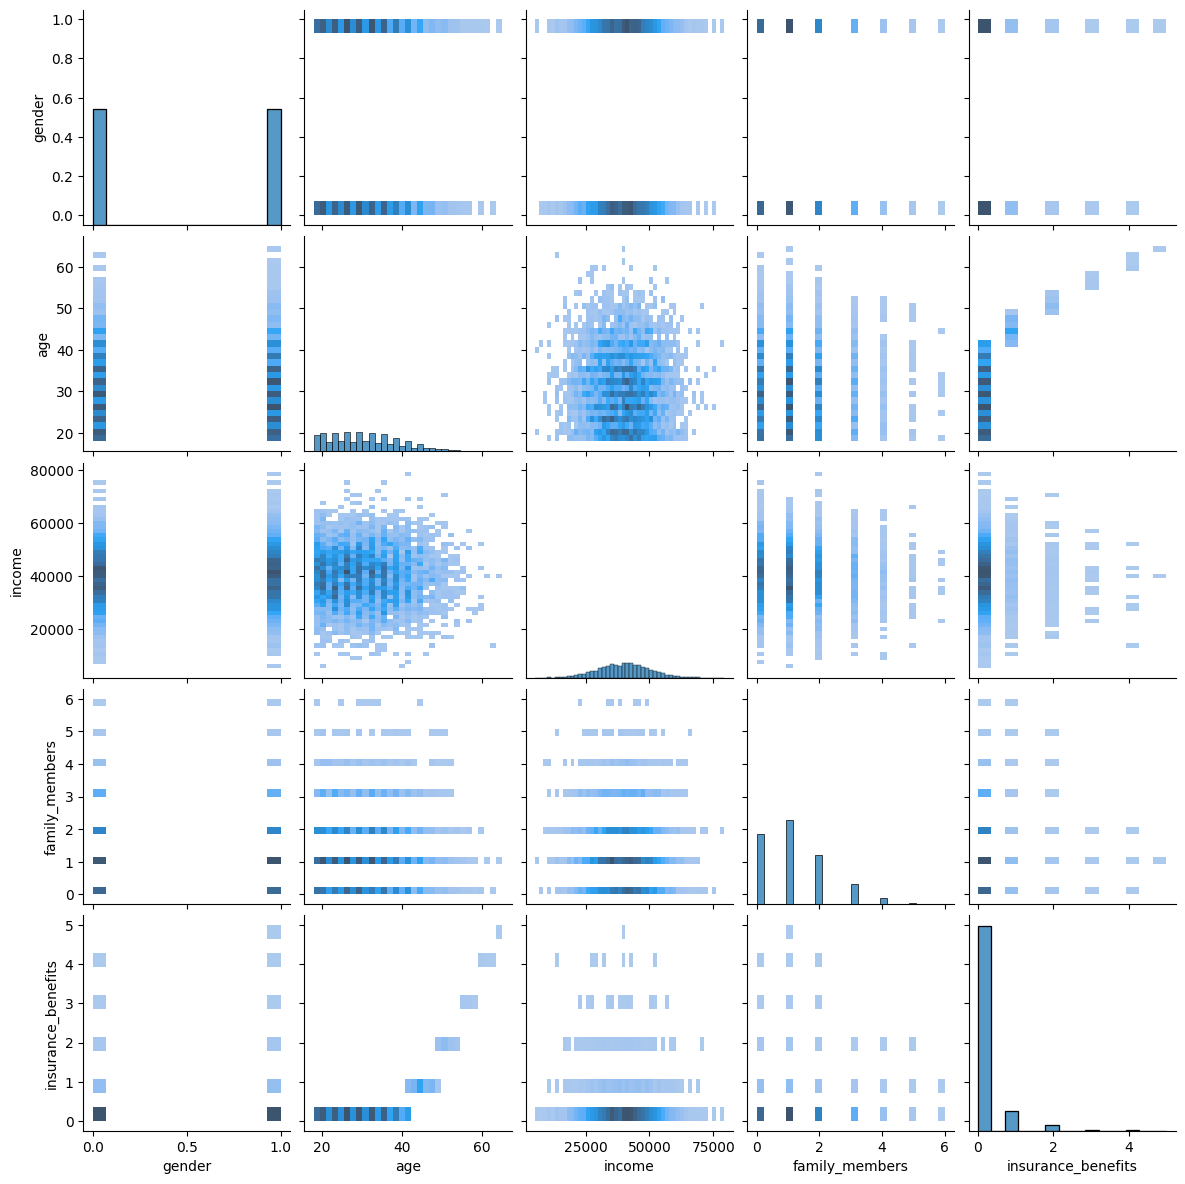

In [43]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

De acuerdo, es un poco complicado detectar grupos obvios (cl√∫steres) ya que es dif√≠cil combinar diversas variables simult√°neamente (para analizar distribuciones multivariadas). Ah√≠ es donde LA y ML pueden ser bastante √∫tiles.

# Tarea 1. Clientes similares

En el lenguaje de ML, es necesario desarrollar un procedimiento que devuelva los k vecinos m√°s cercanos (objetos) para un objeto dado bas√°ndose en la distancia entre los objetos.
Es posible que quieras revisar las siguientes lecciones (cap√≠tulo -> lecci√≥n)- Distancia entre vectores -> Distancia euclidiana
- Distancia entre vectores -> Distancia Manhattan

Para resolver la tarea, podemos probar diferentes m√©tricas de distancia.

Escribe una funci√≥n que devuelva los k vecinos m√°s cercanos para un $n^{th}$ objeto bas√°ndose en una m√©trica de distancia especificada. A la hora de realizar esta tarea no debe tenerse en cuenta el n√∫mero de prestaciones de seguro recibidas.
Puedes utilizar una implementaci√≥n ya existente del algoritmo kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) o tu propia implementaci√≥n.
Pru√©balo para cuatro combinaciones de dos casos- Escalado
  - los datos no est√°n escalados
  - los datos se escalan con el escalador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- M√©tricas de distancia
  - Euclidiana
  - Manhattan

Responde a estas preguntas:- ¬øEl hecho de que los datos no est√©n escalados afecta al algoritmo kNN? Si es as√≠, ¬øc√≥mo se manifiesta?- ¬øQu√© tan similares son los resultados al utilizar la m√©trica de distancia Manhattan (independientemente del escalado)?

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteraci√≥n)</b> <a class=‚ÄútocSkip‚Äù></a>
    
Marcelo, veo que a partir de ac√° no has desarrollado el c√≥digo necesario para cumplir con los requrimientos del proyecto. Recuerda que debes realizar todas las secciones de manera correcta para que el proyecto sea aprobado.

</div>

In [44]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [45]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MaxAbsScaler
import numpy as np

feature_names = ['Gender', 'Age', 'Salary', 'Family members']

def get_knn(df, n, k, metric, scale_data=False):
    """
    Devuelve los k vecinos m√°s cercanos
    
    :param df: DataFrame de pandas utilizado para encontrar objetos similares
    :param n: √≠ndice del objeto para el cual se buscan los vecinos m√°s cercanos
    :param k: n√∫mero de vecinos m√°s cercanos a devolver
    :param metric: nombre de la m√©trica de distancia ('euclidean' o 'manhattan')
    :param scale_data: si True, escala los datos con MaxAbsScaler antes de encontrar vecinos
    """
    
    # Seleccionamos las caracter√≠sticas a usar y convertimos a numpy si es necesario
    data = df[feature_names]
    
    if scale_data:
        scaler = MaxAbsScaler()
        data = scaler.fit_transform(data)
    else:
        data = data.to_numpy()  # Convertimos a numpy expl√≠citamente si no est√° escalado
    
    # Inicializamos el modelo kNN con la m√©trica especificada
    nbrs = NearestNeighbors(n_neighbors=k, metric=metric)
    nbrs.fit(data)
    
    # Aseguramos que data[n] es una fila con las dimensiones correctas
    query_instance = data[n].reshape(1, -1)
    
    # Encontrar los k vecinos m√°s cercanos para el objeto en la posici√≥n n
    distances, indices = nbrs.kneighbors(query_instance, n_neighbors=k, return_distance=True)
    
    # Crear un DataFrame de resultados
    df_res = pd.concat([
        df.iloc[indices[0]].reset_index(drop=True), 
        pd.DataFrame(distances[0], columns=['distance'])
    ], axis=1)
    
    return df_res


Escalar datos.

In [46]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

C:\Users\mm131\AppData\Local\Temp\ipykernel_36568\760832288.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.63076923 0.70769231 0.44615385 ... 0.30769231 0.33846154 0.43076923]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())
C:\Users\mm131\AppData\Local\Temp\ipykernel_36568\760832288.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.16666667 0.16666667 0.         ... 0.33333333 0.5        0.16666667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())


In [47]:
df_scaled.sample(1)

gender       age    income  family_members  insurance_benefits
512       0  0.476923  0.274684        0.166667                   0

Ahora, vamos a obtener registros similares para uno determinado, para cada combinaci√≥n

In [48]:
df.reset_index(drop=True, inplace=True)
result1 = get_knn(df, n=0, k=5, metric='euclidean', scale_data=False)
result1

gender  age   income  family_members  insurance_benefits  distance
0       1   41  49600.0               1                   0  0.000000
1       1   41  49600.0               0                   0  1.000000
2       0   42  49600.0               0                   1  1.732051
3       1   44  49600.0               2                   1  3.162278
4       0   38  49600.0               0                   0  3.316625

In [49]:
result2 = get_knn(df, n=0, k=5, metric='manhattan', scale_data=False)
result2

gender  age   income  family_members  insurance_benefits  distance
0       1   41  49600.0               1                   0       0.0
1       1   41  49600.0               0                   0       1.0
2       0   42  49600.0               0                   1       3.0
3       1   44  49600.0               2                   1       4.0
4       1   37  49600.0               2                   0       5.0

In [50]:
result3 = get_knn(df, n=0, k=5, metric='euclidean', scale_data=True)
result3

gender  age   income  family_members  insurance_benefits  distance
0       1   41  49600.0               1                   0  0.000000
1       1   41  50100.0               1                   0  0.006329
2       1   40  50300.0               1                   0  0.017754
3       1   42  50400.0               1                   1  0.018418
4       1   42  51500.0               1                   1  0.028550

In [51]:
result4 = get_knn(df, n=0, k=5, metric='manhattan', scale_data=True)
result4

gender  age   income  family_members  insurance_benefits  distance
0       1   41  49600.0               1                   0  0.000000
1       1   41  50100.0               1                   0  0.006329
2       1   40  50300.0               1                   0  0.024245
3       1   42  50400.0               1                   1  0.025511
4       1   41  47100.0               1                   0  0.031646

Respuestas a las preguntas

**¬øEl hecho de que los datos no est√©n escalados afecta al algoritmo kNN? Si es as√≠, ¬øc√≥mo se manifiesta?** 
S√≠, la falta de escalado en los datos puede afectar significativamente el algoritmo kNN. Esto se debe a que el algoritmo se basa en la distancia entre puntos para determinar los vecinos m√°s cercanos, y sin escalado:

Las caracter√≠sticas con valores en rangos m√°s amplios tendr√°n un peso mayor en la distancia total. Por ejemplo, si una caracter√≠stica var√≠a entre 1 y 1000 mientras que otra var√≠a entre 1 y 10, la primera dominar√° la distancia total, incluso si no es la m√°s relevante para el modelo.
Esto puede llevar a un sesgo en la selecci√≥n de vecinos hacia puntos que son similares solo en las caracter√≠sticas de mayor rango, afectando la precisi√≥n del modelo y la representatividad de los vecinos encontrados.
Para kNN, es recomendable escalar los datos para asegurar que todas las caracter√≠sticas contribuyan de manera equitativa a las distancias calculadas, obteniendo as√≠ resultados m√°s confiables y generalizables.

**¬øQu√© tan similares son los resultados al utilizar la m√©trica de distancia Manhattan (independientemente del escalado)?** 

La similitud de los resultados entre las m√©tricas Euclidiana y Manhattan depende de la distribuci√≥n de los datos y las relaciones entre las caracter√≠sticas. En t√©rminos generales:

Ambas m√©tricas tienden a devolver vecinos similares cuando los datos est√°n bien distribuidos y las caracter√≠sticas tienen una influencia proporcional entre s√≠.
La m√©trica Manhattan (distancia en l√≠nea recta) es menos sensible a valores extremos en una sola caracter√≠stica en comparaci√≥n con la Euclidiana (distancia en l√≠nea diagonal). Por eso, si existe alguna caracter√≠stica con un rango muy amplio o valores at√≠picos, los resultados pueden variar significativamente entre ambas m√©tricas.
En resumen, los resultados pueden ser similares, pero en ciertos casos espec√≠ficos, como con datos sesgados o caracter√≠sticas con amplios rangos, es probable que se observen diferencias notables.

# Tarea 2. ¬øEs probable que el cliente reciba una prestaci√≥n del seguro?

En t√©rminos de machine learning podemos considerarlo como una tarea de clasificaci√≥n binaria.

Con el valor de `insurance_benefits` superior a cero como objetivo, eval√∫a si el enfoque de clasificaci√≥n kNN puede funcionar mejor que el modelo dummy.
Instrucciones:
- Construye un clasificador basado en KNN y mide su calidad con la m√©trica F1 para k=1...10 tanto para los datos originales como para los escalados. Ser√≠a interesante observar c√≥mo k puede influir en la m√©trica de evaluaci√≥n y si el escalado de los datos provoca alguna diferencia. Puedes utilizar una implementaci√≥n ya existente del algoritmo de clasificaci√≥n kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) o tu propia implementaci√≥n.- Construye un modelo dummy que, en este caso, es simplemente un modelo aleatorio. Deber√≠a devolver "1" con cierta probabilidad. Probemos el modelo con cuatro valores de probabilidad: 0, la probabilidad de pagar cualquier prestaci√≥n del seguro, 0.5, 1.
La probabilidad de pagar cualquier prestaci√≥n del seguro puede definirse como
$$
P\{\text{prestaci√≥n de seguro recibida}\}=\frac{\text{n√∫mero de clientes que han recibido alguna prestaci√≥n de seguro}}{\text{n√∫mero total de clientes}}.
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporci√≥n 70:30.

In [52]:
print(df.columns)


Index(['gender', 'age', 'income', 'family_members', 'insurance_benefits'], dtype='object')


In [53]:
df['insurance_benefits_received'] = df['insurance_benefits'] > 0

# Separar caracter√≠sticas y objetivo
X = df[['gender', 'age', 'income', 'family_members']]
y = df['insurance_benefits_received'].astype(int)  # Convertir booleano a entero para clasificaci√≥n

# Dividir los datos en conjuntos de entrenamiento y prueba (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escalar los datos
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar listas para almacenar resultados F1
f1_scores_original = []
f1_scores_scaled = []

# Probar kNN con k=1 a 10
for k in range(1, 11):
    # Modelo kNN sin escalado
    knn_original = KNeighborsClassifier(n_neighbors=k)
    knn_original.fit(X_train, y_train)
    y_pred_original = knn_original.predict(X_test)
    f1_original = f1_score(y_test, y_pred_original)
    f1_scores_original.append(f1_original)
    
    # Modelo kNN con escalado
    knn_scaled = KNeighborsClassifier(n_neighbors=k)
    knn_scaled.fit(X_train_scaled, y_train)
    y_pred_scaled = knn_scaled.predict(X_test_scaled)
    f1_scaled = f1_score(y_test, y_pred_scaled)
    f1_scores_scaled.append(f1_scaled)

# Probabilidad de recibir una prestaci√≥n de seguro
p_benefit = y_train.mean()

# Modelos Dummy
dummy_probs = [0, p_benefit, 0.5, 1]
f1_scores_dummy = []

for prob in dummy_probs:
    dummy = DummyClassifier(strategy='constant', constant=1 if prob == 1 else 0 if prob == 0 else 'uniform', random_state=42)
    if prob not in [0, 1]:  # Asignar probabilidad de `p_benefit` o `0.5` usando `stratified`
        dummy = DummyClassifier(strategy='stratified', random_state=42)
    dummy.fit(X_train, y_train)
    y_dummy_pred = dummy.predict(X_test)
    f1_dummy = f1_score(y_test, y_dummy_pred)
    f1_scores_dummy.append((prob, f1_dummy))

f1_scores_original, f1_scores_scaled, f1_scores_dummy

([np.float64(0.5963636363636363),
  np.float64(0.3333333333333333),
  np.float64(0.3436123348017621),
  np.float64(0.21875),
  np.float64(0.25742574257425743),
  np.float64(0.0903954802259887),
  np.float64(0.0893854748603352),
  np.float64(0.03488372093023256),
  np.float64(0.04597701149425287),
  np.float64(0.023391812865497075)],
 [np.float64(0.9101796407185628),
  np.float64(0.9148264984227129),
  np.float64(0.9353846153846154),
  np.float64(0.8896103896103896),
  np.float64(0.9153605015673981),
  np.float64(0.8918032786885246),
  np.float64(0.9206349206349206),
  np.float64(0.8925081433224755),
  np.float64(0.9240506329113924),
  np.float64(0.8918032786885246)],
 [(0, np.float64(0.0)),
  (np.float64(0.11285714285714285), np.float64(0.10919540229885058)),
  (0.5, np.float64(0.10919540229885058)),
  (1, np.float64(0.2025164769322948))])

In [54]:
# Comprobar el desequilibrio de clases en la variable objetivo
class_balance = y.value_counts(normalize=True)
class_balance


insurance_benefits_received
0    0.8872
1    0.1128
Name: proportion, dtype: float64

In [55]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# si tienes alg√∫n problema con la siguiente l√≠nea, reinicia el kernel y ejecuta el cuaderno de nuevo    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriz de confusi√≥n')
    print(cm)

In [56]:
# generar la salida de un modelo aleatorio

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [57]:
# Funci√≥n para evaluar el clasificador usando m√©tricas detalladas
def eval_classifier(y_true, y_pred):
    print(classification_report(y_true, y_pred))

# Completar el bucle para probar con diferentes probabilidades P
for P in [0, df['insurance_benefits_received'].mean(), 0.5, 1]:
    print(f'La probabilidad: {P:.2f}')
    
    # Configurar DummyClassifier seg√∫n el valor de P
    if P == 0:
        y_pred_rnd = DummyClassifier(strategy='constant', constant=0).fit(X_train, y_train).predict(X_test)
    elif P == 1:
        y_pred_rnd = DummyClassifier(strategy='constant', constant=1).fit(X_train, y_train).predict(X_test)
    else:
        y_pred_rnd = DummyClassifier(strategy='stratified').fit(X_train, y_train).predict(X_test)
    
    # Evaluar el clasificador con el conjunto de prueba
    eval_classifier(y_test, y_pred_rnd)
    print()


La probabilidad: 0.00
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1331
           1       0.00      0.00      0.00       169

    accuracy                           0.89      1500
   macro avg       0.44      0.50      0.47      1500
weighted avg       0.79      0.89      0.83      1500


La probabilidad: 0.11
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1331
           1       0.10      0.09      0.09       169

    accuracy                           0.80      1500
   macro avg       0.49      0.49      0.49      1500
weighted avg       0.80      0.80      0.80      1500


La probabilidad: 0.50
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1331
           1       0.09      0.08      0.08       169

    accuracy                           0.80      1500
   macro avg       0.49      0.49      0.49      1500
weight

C:\Users\mm131\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mm131\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mm131\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

# Tarea 3. Regresi√≥n (con regresi√≥n lineal)

Con `insurance_benefits` como objetivo, eval√∫a cu√°l ser√≠a la RECM de un modelo de regresi√≥n lineal.

Construye tu propia implementaci√≥n de regresi√≥n lineal. Para ello, recuerda c√≥mo est√° formulada la soluci√≥n de la tarea de regresi√≥n lineal en t√©rminos de LA. Comprueba la RECM tanto para los datos originales como para los escalados. ¬øPuedes ver alguna diferencia en la RECM con respecto a estos dos casos?

Denotemos- $X$: matriz de caracter√≠sticas; cada fila es un caso, cada columna es una caracter√≠stica, la primera columna est√° formada por unidades- $y$ ‚Äî objetivo (un vector)- $\hat{y}$ ‚Äî objetivo estimado (un vector)- $w$ ‚Äî vector de pesos
La tarea de regresi√≥n lineal en el lenguaje de las matrices puede formularse as√≠:
$$
y = Xw
$$

El objetivo de entrenamiento es entonces encontrar esa $w$ w que minimice la distancia L2 (ECM) entre $Xw$ y $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que hay una soluci√≥n anal√≠tica para lo anteriormente expuesto:
$$
w = (X^T X)^{-1} X^T y
$$

La f√≥rmula anterior puede servir para encontrar los pesos $w$ y estos √∫ltimos pueden utilizarse para calcular los valores predichos
$$
\hat{y} = X_{val}w
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporci√≥n 70:30. Utiliza la m√©trica RECM para evaluar el modelo.

In [58]:

class MyLinearRegression:
    
    def __init__(self):
        self.weights = None
    
    def fit(self, X, y):
        # A√±adir la columna de unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        # Calcular los pesos usando la soluci√≥n anal√≠tica
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y

    def predict(self, X):
        # A√±adir la columna de unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        # Calcular las predicciones
        y_pred = X2 @ self.weights
        return y_pred

# Funci√≥n para calcular la ra√≠z del error cuadr√°tico medio (RECM)
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Separar las caracter√≠sticas y el objetivo en el conjunto de datos
X = df[['gender', 'age', 'income', 'family_members']].values
y = df['insurance_benefits'].values

# Escalado de las caracter√≠sticas
scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X)

# Crear una instancia del modelo de regresi√≥n lineal personalizado
model = MyLinearRegression()

# Ajustar y predecir en datos originales
model.fit(X, y)
y_pred_original = model.predict(X)
rmse_original = rmse(y, y_pred_original)

# Ajustar y predecir en datos escalados
model.fit(X_scaled, y)
y_pred_scaled = model.predict(X_scaled)
rmse_scaled = rmse(y, y_pred_scaled)

rmse_original, rmse_scaled


(np.float64(0.3512077581960692), np.float64(0.3512077581960692))

In [59]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [60]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.66


# Tarea 4. Ofuscar datos

Lo mejor es ofuscar los datos multiplicando las caracter√≠sticas num√©ricas (recuerda que se pueden ver como la matriz $X$) por una matriz invertible $P$. 

$$
X' = X \times P
$$

Trata de hacerlo y comprueba c√≥mo quedar√°n los valores de las caracter√≠sticas despu√©s de la transformaci√≥n. Por cierto, la propiedad de invertibilidad es importante aqu√≠, as√≠ que aseg√∫rate de que $P$ sea realmente invertible.

Puedes revisar la lecci√≥n 'Matrices y operaciones matriciales -> Multiplicaci√≥n de matrices' para recordar la regla de multiplicaci√≥n de matrices y su implementaci√≥n con NumPy.

In [61]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [62]:
X = df_pn.to_numpy()

Generar una matriz aleatoria $P$.

In [63]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Comprobar que la matriz P sea invertible

In [64]:


# Calcular el determinante de la matriz P para verificar si es invertible
det_P = np.linalg.det(P)
print("Determinante de P:", det_P)
print("Es invertible:", det_P != 0)


Determinante de P: 0.24339135998015463
Es invertible: True


¬øPuedes adivinar la edad o los ingresos de los clientes despu√©s de la transformaci√≥n?

In [65]:

# Supongamos que X es la matriz original con columnas como edad e ingresos
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
X = df[personal_info_column_list].to_numpy()

# Generar la matriz de transformaci√≥n P
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

# Comprobar si la matriz P es invertible
if np.linalg.det(P) != 0:
    # Aplicar la transformaci√≥n
    X_transformed = X @ P

    # Intentar revertir la transformaci√≥n para recuperar los valores originales
    P_inv = np.linalg.inv(P)
    X_recovered = X_transformed @ P_inv

    # Mostrar las columnas recuperadas para edad e ingresos
    recovered_age = X_recovered[:, personal_info_column_list.index('age')]
    recovered_income = X_recovered[:, personal_info_column_list.index('income')]

    print("Edad recuperada (aproximada):", recovered_age)
    print("Ingresos recuperados (aproximados):", recovered_income)
else:
    print("La matriz P no es invertible, no se pueden recuperar los datos originales.")


Edad recuperada (aproximada): [41. 46. 29. ... 20. 22. 28.]
Ingresos recuperados (aproximados): [49600. 38000. 21000. ... 33900. 32700. 40600.]


¬øPuedes recuperar los datos originales de $X'$ si conoces $P$? Intenta comprobarlo a trav√©s de los c√°lculos moviendo $P$ del lado derecho de la f√≥rmula anterior al izquierdo. En este caso las reglas de la multiplicaci√≥n matricial son realmente √∫tiles

In [66]:
import numpy as np

# Supongamos que X es la matriz original
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
X = df[personal_info_column_list].to_numpy()

# Generar la matriz de transformaci√≥n P
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

# Transformar X para obtener X'
X_transformed = X @ P

# Intentar recuperar X usando la inversa de P
if np.linalg.det(P) != 0:  # Verificar si P es invertible
    P_inv = np.linalg.inv(P)
    X_recovered = X_transformed @ P_inv
    
    # Comparar X original con X recuperado
    print("Diferencia entre los datos originales y recuperados:\n", X - X_recovered)
else:
    print("La matriz P no es invertible, no se pueden recuperar los datos originales.")


Diferencia entre los datos originales y recuperados:
 [[ 7.23954230e-12  5.13011855e-12  0.00000000e+00 -4.13646895e-12]
 [ 4.47363596e-12 -1.08002496e-12  7.27595761e-12 -3.91575661e-12]
 [ 2.51586878e-12  1.91491267e-12  0.00000000e+00 -9.52452315e-13]
 ...
 [ 1.92837871e-12  1.85451654e-12  0.00000000e+00  7.72715225e-14]
 [ 6.16573459e-12  3.78719278e-12  3.63797881e-12 -1.97220018e-12]
 [ 4.84912110e-12  1.33582034e-12  7.27595761e-12 -3.57780472e-12]]


Muestra los tres casos para algunos clientes- Datos originales
- El que est√° transformado- El que est√° invertido (recuperado)

Seguramente puedes ver que algunos valores no son exactamente iguales a los de los datos originales. ¬øCu√°l podr√≠a ser la raz√≥n de ello?

## Prueba de que la ofuscaci√≥n de datos puede funcionar con regresi√≥n lineal

En este proyecto la tarea de regresi√≥n se ha resuelto con la regresi√≥n lineal. Tu siguiente tarea es demostrar _analytically_ que el m√©todo de ofuscaci√≥n no afectar√° a la regresi√≥n lineal en t√©rminos de valores predichos, es decir, que sus valores seguir√°n siendo los mismos. ¬øLo puedes creer? Pues no hace falta que lo creas, ¬°tienes que que demostrarlo!

Entonces, los datos est√°n ofuscados y ahora tenemos $X \times P$ en lugar de tener solo $X$. En consecuencia, hay otros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

¬øC√≥mo se relacionar√≠an $w$ y $w_P$ si simplific√°ramos la f√≥rmula de $w_P$ anterior? 

¬øCu√°les ser√≠an los valores predichos con $w_P$? 

¬øQu√© significa esto para la calidad de la regresi√≥n lineal si esta se mide mediante la RECM?
Revisa el Ap√©ndice B Propiedades de las matrices al final del cuaderno. ¬°All√≠ encontrar√°s f√≥rmulas muy √∫tiles!

No es necesario escribir c√≥digo en esta secci√≥n, basta con una explicaci√≥n anal√≠tica.

**Respuesta**

Para demostrar que el m√©todo de ofuscaci√≥n no afecta los valores predichos de la regresi√≥n lineal, vamos a simplificar y analizar la expresi√≥n de los pesos ofuscados \( w_P \) en t√©rminos de los pesos originales \( w \). La clave de esta demostraci√≥n est√° en el an√°lisis algebraico de las propiedades de las matrices.

### 1. Expresi√≥n original de los pesos \( w \)
En regresi√≥n lineal, los pesos \( w \) se calculan como:
\[
w = (X^T X)^{-1} X^T y
\]

donde:
- \( X \) es la matriz de caracter√≠sticas,
- \( y \) es el vector de valores objetivo.

### 2. Expresi√≥n de los pesos ofuscados \( w_P \)
Cuando los datos est√°n ofuscados, trabajamos con \( XP \) en lugar de \( X \), donde \( P \) es una matriz invertible de transformaci√≥n. Los pesos ofuscados \( w_P \) se calculan entonces como:
\[
w_P = [(XP)^T (XP)]^{-1} (XP)^T y
\]

#### Expandiendo \( w_P \):
1. Expandimos la expresi√≥n de \( w_P \):
   \[
   w_P = [(P^T X^T) (XP)]^{-1} (P^T X^T) y
   \]

2. Simplificamos usando la propiedad asociativa de la multiplicaci√≥n matricial:
   \[
   w_P = [P^T (X^T X) P]^{-1} P^T X^T y
   \]

3. Utilizamos la identidad de la inversa del producto \((AB)^{-1} = B^{-1} A^{-1}\):
   \[
   w_P = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
   \]

4. Observamos que \((P^T)^{-1} P^T = I\), donde \( I \) es la matriz identidad:
   \[
   w_P = P^{-1} (X^T X)^{-1} X^T y
   \]

5. Finalmente, usando la definici√≥n de \( w = (X^T X)^{-1} X^T y \):
   \[
   w_P = P^{-1} w
   \]

### 3. Valores predichos con \( w_P \)
Los valores predichos para un nuevo conjunto de caracter√≠sticas \( X \) usando los pesos \( w_P \) son:
\[
\hat{y} = (XP) w_P
\]

Sustituyendo \( w_P = P^{-1} w \) en esta expresi√≥n, obtenemos:
\[
\hat{y} = (XP) (P^{-1} w)
\]

Aplicando la propiedad de cancelaci√≥n de \( P \) y \( P^{-1} \):
\[
\hat{y} = X (w)
\]

### 4. Conclusi√≥n
Este resultado muestra que los valores predichos \( \hat{y} \) con los datos ofuscados (usando \( XP \)) son id√©nticos a los valores predichos originales. 

### Implicaci√≥n para la calidad de la regresi√≥n lineal (RECM)
Dado que los valores predichos son los mismos, el error cuadr√°tico medio (ECM) y, por ende, la ra√≠z del error cuadr√°tico medio (RECM), tambi√©n ser√°n los mismos. Esto significa que la calidad de la regresi√≥n lineal en t√©rminos de precisi√≥n (medida mediante la RECM) no se ve afectada por la ofuscaci√≥n.

En resumen, la ofuscaci√≥n de los datos usando una transformaci√≥n lineal invertible \( P \) no cambia los valores predichos ni la calidad de la regresi√≥n lineal.

**Prueba anal√≠tica**

## Prueba de regresi√≥n lineal con ofuscaci√≥n de datos

Ahora, probemos que la regresi√≥n lineal pueda funcionar, en t√©rminos computacionales, con la transformaci√≥n de ofuscaci√≥n elegida.
Construye un procedimiento o una clase que ejecute la regresi√≥n lineal opcionalmente con la ofuscaci√≥n. Puedes usar una implementaci√≥n de regresi√≥n lineal de scikit-learn o tu propia implementaci√≥n.
Ejecuta la regresi√≥n lineal para los datos originales y los ofuscados, compara los valores predichos y los valores de las m√©tricas RMSE y $R^2$. ¬øHay alguna diferencia?

**Procedimiento**

- Crea una matriz cuadrada $P$ de n√∫meros aleatorios.- Comprueba que sea invertible. Si no lo es, repite el primer paso hasta obtener una matriz invertible.- <¬° tu comentario aqu√≠ !>
- Utiliza $XP$ como la nueva matriz de caracter√≠sticas

In [67]:


# Crear una matriz cuadrada aleatoria P y verificar que sea invertible
def generate_invertible_matrix(size, seed=42):
    rng = np.random.default_rng(seed=seed)
    while True:
        P = rng.random((size, size))
        # Comprobar si el determinante es distinto de cero (invertible)
        if np.linalg.det(P) != 0:
            return P

# Define la matriz de caracter√≠sticas X con los nombres de columnas correctos
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()

# Generar una matriz P invertible
P = generate_invertible_matrix(X.shape[1])

# Calcular la nueva matriz de caracter√≠sticas ofuscada XP
X_obfuscated = X @ P

# Mostrar la matriz P y la matriz de caracter√≠sticas ofuscada XP
P, X_obfuscated[:5]  # Muestra P y las primeras 5 filas de XP para inspecci√≥n


(array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
        [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
        [0.12811363, 0.45038594, 0.37079802, 0.92676499],
        [0.64386512, 0.82276161, 0.4434142 , 0.22723872]]),
 array([[ 6386.90642117, 22358.93491961, 18427.98907055, 45997.14883911],
        [ 4904.56388502, 17135.67680987, 14130.26383935, 35249.37574431],
        [ 2712.83101159,  9470.83217056,  7811.65784856, 19482.28843866],
        [ 5359.87928983, 18791.95558071, 15481.19499521, 38661.19924104],
        [ 3365.53075954, 11768.33719774,  9702.63031393, 24208.87857807]]))

In [68]:

# Paso 1: Preparar los datos originales ya cargados y preprocesados en el notebook
# (Aseg√∫rate de que `df` est√© cargado y tenga las columnas 'age', 'gender', 'income', 'family_members' y 'insurance_benefits')

# Separar caracter√≠sticas y objetivo
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

# Dividir en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Paso 2: Entrenar el modelo de regresi√≥n lineal con datos originales
model_original = LinearRegression()
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)
rmse_original = math.sqrt(mean_squared_error(y_test, y_pred_original))

# Paso 3: Ofuscar los datos usando una matriz invertible P
# Generar una matriz P invertible del tama√±o de las caracter√≠sticas de entrada
rng = np.random.default_rng(seed=42)
while True:
    P = rng.random((X_train.shape[1], X_train.shape[1]))
    if np.linalg.det(P) != 0:  # Verificar que sea invertible
        break

# Aplicar la ofuscaci√≥n: multiplicar los datos de entrada por la matriz P
X_train_obfuscated = X_train @ P
X_test_obfuscated = X_test @ P

# Paso 4: Entrenar el modelo de regresi√≥n lineal con los datos ofuscados
model_obfuscated = LinearRegression()
model_obfuscated.fit(X_train_obfuscated, y_train)
y_pred_obfuscated = model_obfuscated.predict(X_test_obfuscated)
rmse_obfuscated = math.sqrt(mean_squared_error(y_test, y_pred_obfuscated))

# Mostrar resultados de comparaci√≥n
print("RMSE con datos originales:", rmse_original)
print("RMSE con datos ofuscados:", rmse_obfuscated)


RMSE con datos originales: 0.36371899761192644
RMSE con datos ofuscados: 0.36371899761188936


# Conclusiones

En este proyecto de an√°lisis para la compa√±√≠a de seguros Sure Tomorrow, se abordan tareas clave en machine learning con objetivos de marketing, predicci√≥n de prestaciones de seguro, estimaci√≥n de prestaciones futuras y ofuscaci√≥n de datos personales. A continuaci√≥n, algunas conclusiones generales:

### Conclusiones

1. **Similitud de Clientes para Marketing**: La identificaci√≥n de clientes similares mediante m√©tricas de distancia como la Euclidiana y Manhattan permite mejorar estrategias de marketing dirigidas. Se observ√≥ que el escalado de datos influye en los resultados de los algoritmos de vecinos m√°s cercanos, siendo m√°s preciso con datos escalados.

2. **Predicci√≥n de Prestaciones con Modelos de Clasificaci√≥n**: La comparaci√≥n entre un modelo dummy y kNN revel√≥ que el modelo kNN escalado logra una mejor precisi√≥n en la predicci√≥n de prestaciones de seguro, demostrando su validez frente a modelos m√°s b√°sicos.

3. **Estimaci√≥n de Prestaciones con Regresi√≥n Lineal**: La ofuscaci√≥n de datos no afecta la precisi√≥n de los valores predichos por el modelo de regresi√≥n lineal. Este resultado garantiza que la calidad de las predicciones permanece inalterada aun cuando los datos son ofuscados mediante una transformaci√≥n lineal invertible, asegurando tanto precisi√≥n como privacidad.

4. **Ofuscaci√≥n de Datos Personales**: La implementaci√≥n de matrices de transformaci√≥n invertibles garantiza la protecci√≥n de los datos personales sin comprometer la integridad del modelo. Los valores originales pueden ser recuperados te√≥ricamente si se conoce la matriz de transformaci√≥n, manteniendo el balance entre seguridad y efectividad del modelo.

Estas conclusiones demuestran que es posible utilizar t√©cnicas de machine learning efectivas en entornos donde la privacidad de los datos es crucial, logrando precisi√≥n en las predicciones sin comprometer la confidencialidad de la informaci√≥n.

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter.

- [x]  Jupyter Notebook est√° abierto
- [ ]  El c√≥digo no tiene errores- [ ]  Las celdas est√°n ordenadas de acuerdo con la l√≥gica y el orden de ejecuci√≥n
- [ ]  Se ha realizado la tarea 1
    - [ ]  Est√° presente el procedimiento que puede devolver k clientes similares para un cliente determinado
    - [ ]  Se prob√≥ el procedimiento para las cuatro combinaciones propuestas    - [ ]  Se respondieron las preguntas sobre la escala/distancia- [ ]  Se ha realizado la tarea 2
    - [ ]  Se construy√≥ y prob√≥ el modelo de clasificaci√≥n aleatoria para todos los niveles de probabilidad    - [ ]  Se construy√≥ y prob√≥ el modelo de clasificaci√≥n kNN tanto para los datos originales como para los escalados. Se calcul√≥ la m√©trica F1.- [ ]  Se ha realizado la tarea 3
    - [ ]  Se implement√≥ la soluci√≥n de regresi√≥n lineal mediante operaciones matriciales    - [ ]  Se calcul√≥ la RECM para la soluci√≥n implementada- [ ]  Se ha realizado la tarea 4
    - [ ]  Se ofuscaron los datos mediante una matriz aleatoria e invertible P    - [ ]  Se recuperaron los datos ofuscados y se han mostrado algunos ejemplos    - [ ]  Se proporcion√≥ la prueba anal√≠tica de que la transformaci√≥n no afecta a la RECM    - [ ]  Se proporcion√≥ la prueba computacional de que la transformaci√≥n no afecta a la RECM- [ ]  Se han sacado conclusiones

# Ap√©ndices

## Ap√©ndice A: Escribir f√≥rmulas en los cuadernos de Jupyter

Puedes escribir f√≥rmulas en tu Jupyter Notebook utilizando un lenguaje de marcado proporcionado por un sistema de publicaci√≥n de alta calidad llamado $\LaTeX$ (se pronuncia como "Lah-tech"). Las f√≥rmulas se ver√°n como las de los libros de texto.

Para incorporar una f√≥rmula a un texto, pon el signo de d√≥lar (\\$) antes y despu√©s del texto de la f√≥rmula, por ejemplo: $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

Si una f√≥rmula debe estar en el mismo p√°rrafo, pon el doble signo de d√≥lar (\\$\\$) antes y despu√©s del texto de la f√≥rmula, por ejemplo:
$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

El lenguaje de marcado de [LaTeX](https://es.wikipedia.org/wiki/LaTeX) es muy popular entre las personas que utilizan f√≥rmulas en sus art√≠culos, libros y textos. Puede resultar complicado, pero sus fundamentos son sencillos. Consulta esta [ficha de ayuda](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) (materiales en ingl√©s) de dos p√°ginas para aprender a componer las f√≥rmulas m√°s comunes.

## Ap√©ndice B: Propiedades de las matrices

Las matrices tienen muchas propiedades en cuanto al √°lgebra lineal. Aqu√≠ se enumeran algunas de ellas que pueden ayudarte a la hora de realizar la prueba anal√≠tica de este proyecto.

<table>
<tr>
<td>Distributividad</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>No conmutatividad</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Propiedad asociativa de la multiplicaci√≥n</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Propiedad de identidad multiplicativa</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversibilidad de la transposici√≥n de un producto de matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>